In [1]:
!pip install tensorflow-gpu==1.13.1

In [2]:
import tensorflow as tf
import numpy as np

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# Problem 1 (10 pts)

**CIFAR10 클래스가 다음과 같은 기능을 갖도록 코드를 작성하시오.**


-get_train_batch 함수로 batch_size 만큼의 학습데이터를 return한다.

-get_test_batch 함수로 Validation or Test 데이터를 return한다.
*   is_val=True 이면 Validation 데이터를, False이면 Test데이터를 return한다.
*   split_num개만큼 데이터를 split하여 list 형태로 return한다. ex) Data : numpy array [1,2,3,4,5,6], split_num : 2, -> return : [[1,2,3], [4,5,6]]

-epochs와 iterations 변수를 통해 현재 epoch과 iteration 정보를 얻을 수 있다.
*   ex) cifar10 = CIFAR10(), print(cifar10.epochs) -> 20

-reset 함수를 통해 epoch과 iteration 정보를 초기화 시킨다. (새로운 모델에 처음부터 다시 학습을 시작할 때 사용)

In [0]:
class CIFAR10:
  def __init__(self):
    self.X_train = np.load("/gdrive/My Drive/숙제4/CIFAR10_datasets/CIFAR10_X_train.npy")
    self.Y_train = np.load("/gdrive/My Drive/숙제4/CIFAR10_datasets/CIFAR10_y_train.npy")
    self.X_test = np.load("/gdrive/My Drive/숙제4/CIFAR10_datasets/CIFAR10_X_test.npy")
    self.Y_test = np.load("/gdrive/My Drive/숙제4/CIFAR10_datasets/CIFAR10_y_test.npy")

    self.X_val = self.X_train[45000:]
    self.Y_val = self.Y_train[45000:]
    self.X_train = self.X_train[:45000]
    self.Y_train = self.Y_train[:45000]

    self.idx_flag = 0
    self.epochs = 0
    self.iterations = 0

  def get_train_batch(self, batch_size=64):
    X_batch, Y_batch = None, None,
    ####################### Put your code here ###############
    # X_batch = tf.train.batch(X_train)
    # Y_batch = tf.train.batch(Y_train)
    if self.idx_flag > 45000:
      self.idx_flag = 0
      self.epochs += 1
    if self.idx_flag == 0:
      idx = np.arange(0,45000)
      np.random.shuffle(idx)
      self.X_train = self.X_train[idx]
      self.Y_train = self.Y_train[idx]
    X_batch = self.X_train[self.idx_flag : self.idx_flag+batch_size]
    Y_batch = self.Y_train[self.idx_flag : self.idx_flag+batch_size]
    self.idx_flag += batch_size
    self.iterations += 1
    ##########################################################
    return X_batch, Y_batch

  def get_test_batch(self, is_val=True, split_num=100):
    split_X, split_Y = None, None
    ####################### Put your code here ###############
    # if is_val:
    #   size = self.X_val.shape[0]
    #   offset = int(size/splint_num)
    #   for i in range(0,size,offset):
    #     split_X.append(self.X_val[i:i+offset])
    #     split_Y.append(self.Y_val[i:i+offset])
    # else:
    #   size = self.X_test.shape[0]
    #   offset = int(size/split_num)
    #   for i in range(0,size,offset):
    #     spli
    if is_val:
      split_X = np.asarray(np.split(self.X_val,split_num))
      split_Y = np.asarray(np.split(self.Y_val,split_num))
    else:
      split_X = np.asarray(np.split(self.X_test,split_num))
      split_Y = np.asarray(np.split(self.Y_test,split_num))
      
    split_X = split_X.tolist()
    split_Y = split_Y.tolist()  
    ##########################################################
    return split_X, split_Y
  
  def reset(self):
    ####################### Put your code here ###############
    self.idx_flag = 0
    self.epochs = 0
    self.iterations = 0
    ##########################################################

# Problem 2 (20 pts)
**tensorflow 라이브러리를 이용하여 다음 함수들을 작성하시오.**

In [0]:
def conv_layer(input, output_channel, filter_size=2, stride=1, padding='same', use_bias=True):
  output = None
  ####################### Put your code here ###############
  # f_size = [filter_size,filter_size]
  # strides = [stride,stride]

  output = tf.layers.conv2d(inputs = input,filters = output_channel,kernel_size = filter_size,strides = stride,padding = padding ,use_bias = use_bias)
  # out = tf.nn.conv2d(input, output, padding="SAME", strides = [1, strides, strides, 1])
  # out = tf.nn.bias_add(out, bias)
  #out = tf.nn.relu(out)
  ##########################################################
  return output

def fc_layer(input, output_size, use_bias=True):
  output = None
  ####################### Put your code here ###############
  output = tf.layers.dense(inputs=input,units = output_size,use_bias = use_bias)
  ##########################################################
  return output

def squeeze_excitation_block(input, ratio=16):
  output = None
  ####################### Put your code here ###############
  output_channel = int(input.shape[3])
  squeeze = global_average_pooling(input)
  excitation = fc_layer(squeeze,int(output_channel/ratio))
  excitation = relu(excitation)
  excitation = fc_layer(excitation,output_channel)
  excitation = sigmoid(excitation)

  excitation = tf.reshape(excitation,[-1,1,1,output_channel])

  output = input * excitation

  ##########################################################
  return output

def relu(input):
  output = None
  ####################### Put your code here ###############
  output = tf.nn.relu(input)
  ##########################################################
  return output

def sigmoid(input):
  output = None
  ####################### Put your code here ###############
  output=tf.nn.sigmoid(input)
  ##########################################################
  return output

def global_average_pooling(input):
  output = None
  ####################### Put your code here ###############
  output = tf.keras.layers.GlobalAveragePooling2D()(input)

  ##########################################################
  return output

def max_pooling(input, filter_size=2, stride=2, padding="same"):
  output = None
  ####################### Put your code here ###############
  output = tf.layers.max_pooling2d(inputs=input,pool_size=filter_size,strides=stride,padding=padding)
  ##########################################################
  return output
  
def flatten_block(input):
  output = None
  ####################### Put your code here ###############
  output = tf.layers.flatten(input)
  ##########################################################
  return output

def batch_norm(input, is_training):
  output = None
  ####################### Put your code here ###############
  output = tf.layers.batch_normalization(inputs=input, training = is_training)
  ##########################################################
  return output

# Problem 3 (20 pts)

Problem 2에서 작성한 함수들을 이용하여 다음 조건을 만족하는 CNN 모델을 작성하시오.
*   Validation accuracy가 70% 이상인 네트워크.
*   use_SE=True이면 Squeeze and Excitation block이 추가된 모델을, False이면 추가되지 않은 모델을 return.
*   두개의 모델은 SE block의 유무를 제외한 모든 세팅이 같아야함. (하이퍼 파라미터, SE block 이외의 layer 구조 등)

In [0]:
def cnn_model(X, Y, is_training, use_SE=True):
  loss, accuracy, backprop = None, None, None
  ####################### Put your code here ###############
  #channel_size = int(X.shape[1])
  channel_size = 32
  conv1 = conv_layer(X,channel_size,filter_size = 3)
  if use_SE:
    conv1 = squeeze_excitation_block(conv1)
  conv1 = batch_norm(conv1,is_training)
  conv1 = relu(conv1)

  conv2 = conv_layer(conv1,channel_size,filter_size =3)
  if use_SE:
    conv2 = squeeze_excitation_block(conv2)
  conv2 = batch_norm(conv2,is_training)
  conv2 = relu(conv2)
  conv2 = max_pooling(conv2)

  conv3 = conv_layer(conv2,channel_size*4,filter_size = 3)
  if use_SE:
    conv3 = squeeze_excitation_block(conv3)
  conv3 = batch_norm(conv3,is_training)
  conv3 = relu(conv3)
  conv3 = max_pooling(conv3)
  conv4 = conv_layer(conv3,channel_size*4)
  if use_SE:
    conv4 = squeeze_excitation_block(conv4)
  conv4 = batch_norm(conv4,is_training)
  conv4 = relu(conv4)
  conv4 = max_pooling(conv4)

  flat_layer = flatten_block(conv4)
  fully_con = fc_layer(flat_layer,1500)
  fully_con = batch_norm(fully_con,is_training)
  fully_con = relu(fully_con)
  softmax = fc_layer(fully_con,10)

  y_pred = tf.argmax(softmax,axis=1)
  Y_one_hot = tf.squeeze(tf.one_hot(Y,10))
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_one_hot,logits=softmax))
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  with tf.control_dependencies(update_ops):
    backprop = tf.train.AdamOptimizer(1e-3).minimtnrwize(loss)
  #backprop = tf.train.RMSPropOptimizer(1e-3).minimize(loss)
  correct_predict = tf.equal(y_pred,tf.argmax(Y_one_hot,axis = 1))
  accuracy = tf.reduce_mean(tf.cast(correct_predict,tf.float32))



  ##########################################################
  return loss, accuracy, backprop

# Problem 4 (20 pts)

Problem 3에서 작성된 모델을 학습하고 테스트 하는 함수를 작성하여라.

In [0]:
def train_model(sess, cifar10, X, Y, is_training, loss, accuracy, backprop, epochs=10, batch_size=32, check_iter=100, split_num=100):
  train_loss_list, validation_loss_list, train_acc_list, validation_acc_list = [], [], [], []
  while cifar10.epochs < epochs:
    l, acc = None, None
    ####################### Put your code here ###############
    X_batch, Y_batch = cifar10.get_train_batch(batch_size =batch_size)

    # l = loss.eval(feed_dict ={X:X_batch,Y:Y_batch,is_training:True})
    # acc = accuracy.eval(feed_dict = {X:X_batch,Y:Y_batch,is_training:True})
    # sess.run(backprop,feed_dict = {X:X_batch,Y:Y_batch,is_training:True})
    l, back, acc = sess.run([loss, backprop, accuracy], feed_dict={X: X_batch, Y: Y_batch, is_training: True})
    ##########################################################
    if cifar10.iterations%check_iter == 0:
      val_loss, val_acc = test_model(sess, cifar10, X, Y, is_training, loss, accuracy, split_num, is_val=True)
      print('Epochs : %d, Iterations : %d, Train_loss : %f, Train_accuracy : %.3f, Val_loss : %f, Val_accuracy : %.3f'%\
            (cifar10.epochs, cifar10.iterations, l, acc, val_loss, val_acc))
      train_loss_list.append(l)
      validation_loss_list.append(val_loss)
      train_acc_list.append(acc)
      validation_acc_list.append(val_acc)
      
  return train_loss_list, validation_loss_list, train_acc_list, validation_acc_list

def test_model(sess, cifar10, X, Y, is_training, loss, accuracy, split_num, is_val):
  X_list, Y_list = cifar10.get_test_batch(is_val=is_val, split_num=split_num)
  accs, losses = None, None
  ####################### Put your code here ###############
  accs = 0.0
  losses = 0.0
  ##########################################################
  for X_batch, Y_batch in zip(X_list, Y_list):
    ####################### Put your code here ###############
    accs += accuracy.eval(feed_dict={X:X_batch,Y:Y_batch,is_training:True})
    losses += loss.eval(feed_dict = {X:X_batch,Y:Y_batch,is_training:True})
    ##########################################################
  ####################### Put your code here ###############
  accs /= split_num
  losses /= split_num
  ##########################################################
  return losses, accs

# Problem 5 (20 pts)

SE block이 없는 CNN 모델과, SE block이 추가된 CNN 모델을 각각 학습하시오. (단, 아래의 조건을 만족하여야 함)
*   둘중 적어도 하나의 모델은 Validation accuracy 70% 이상. (도달하지 못한다면 모델을 Problem 3의 모델을 수정하시오)
*   두개의 모델은 SE block의 유무를 제외한 모든 세팅이 같아야함. (하이퍼 파라미터, SE block 이외의 layer 구조 등)

# CNN training and test without Squeeze and Excitation block

In [8]:
cifar10 = CIFAR10()

X = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3])
Y = tf.placeholder(dtype=tf.int64, shape=[None])
is_training = tf.placeholder(tf.bool)

loss, accuracy, backprop = cnn_model(X, Y, is_training, use_SE=False)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  result_without_SE = train_model(sess, cifar10, X, Y, is_training, loss, accuracy, backprop, epochs=100, check_iter=300, batch_size=128)
  test_loss, test_acc = test_model(sess, cifar10, X, Y, is_training, loss, accuracy, split_num=100, is_val=False)
  print("Test_loss : %f, Test_accuracy : %.3f"%(test_loss, test_acc))

sess.close()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.
Epochs : 0, Iterations : 300, Train_loss : 0.820932, Train_accuracy : 0.695, Val_loss : 0.965281, Val_accuracy : 0.670
Epochs : 1, Iterations : 600, Train_loss : 0.784899, Train_accuracy : 0.758, Val_loss : 0.791151, Val_accuracy : 0.732
Epochs : 2, Iterations : 900, Train_loss : 0.584361, Train_accuracy : 0.797, Val_loss : 0.734030, Val_accuracy : 0.750
Epochs : 3, 

# CNN training and test with Squeeze and Excitation block

In [9]:
cifar10.reset()
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3])
Y = tf.placeholder(dtype=tf.int64, shape=[None])
is_training = tf.placeholder(tf.bool)

loss, accuracy, backprop = cnn_model(X, Y, is_training, use_SE=True)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  result_with_SE = train_model(sess, cifar10, X, Y, is_training, loss, accuracy, backprop, epochs=100, check_iter=300, batch_size=128)
  test_loss, test_acc = test_model(sess, cifar10, X, Y, is_training, loss, accuracy, split_num=100, is_val=False)
  print("Test_loss : %f, Test_accuracy : %.3f"%(test_loss, test_acc))

sess.close()

Epochs : 0, Iterations : 300, Train_loss : 1.009072, Train_accuracy : 0.641, Val_loss : 1.022666, Val_accuracy : 0.651
Epochs : 1, Iterations : 600, Train_loss : 1.068638, Train_accuracy : 0.680, Val_loss : 0.934973, Val_accuracy : 0.714
Epochs : 2, Iterations : 900, Train_loss : 0.533411, Train_accuracy : 0.812, Val_loss : 0.744368, Val_accuracy : 0.747
Epochs : 3, Iterations : 1200, Train_loss : 0.380151, Train_accuracy : 0.852, Val_loss : 0.686982, Val_accuracy : 0.772
Epochs : 4, Iterations : 1500, Train_loss : 0.231576, Train_accuracy : 0.922, Val_loss : 0.676471, Val_accuracy : 0.781
Epochs : 5, Iterations : 1800, Train_loss : 0.117311, Train_accuracy : 0.961, Val_loss : 0.713136, Val_accuracy : 0.782
Epochs : 5, Iterations : 2100, Train_loss : 0.170667, Train_accuracy : 0.961, Val_loss : 0.761407, Val_accuracy : 0.777
Epochs : 6, Iterations : 2400, Train_loss : 0.061527, Train_accuracy : 0.977, Val_loss : 0.808036, Val_accuracy : 0.782
Epochs : 7, Iterations : 2700, Train_loss :

# Problem 6 (10 pts)

matplotlib와 result_with_SE, result_without_SE 를 이용하여 다음 learning curve들을 plot 하시오. (여러개의 cell을 사용하여도 무방)

*   SE 사용 네트워크와 SE 미사용 네트워크의 training loss
*   SE 사용 네트워크와 SE 미사용 네트워크의 validation loss
*   SE 사용 네트워크와 SE 미사용 네트워크의 validation accuracy
*   SE 사용 네트워크의 training loss와 validation loss
*   SE 사용 네트워크의 training accuracy와 validation accuracy
*   SE 미사용 네트워크의 training loss와 validation loss
*   SE 미사용 네트워크의 training accuracy와 validation accuracy



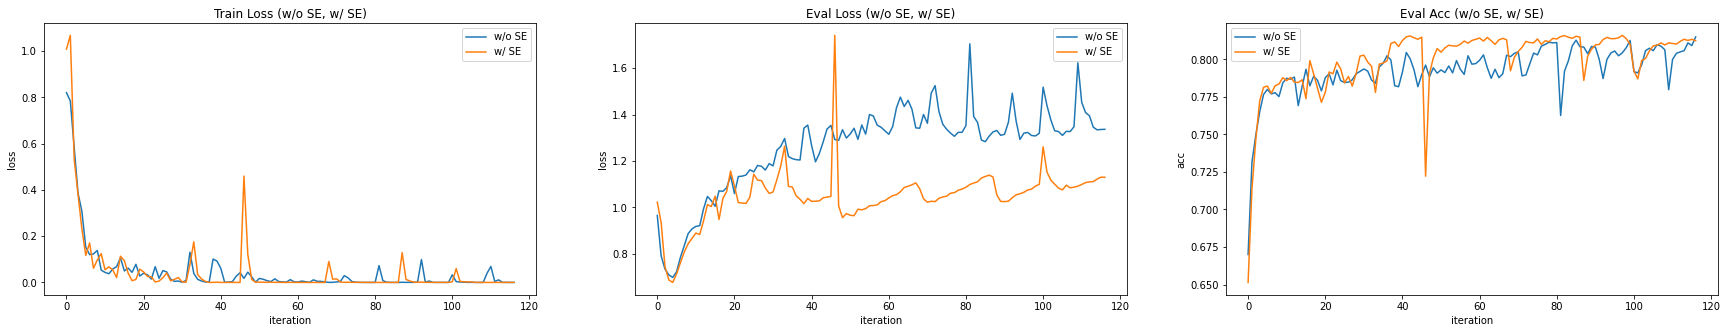

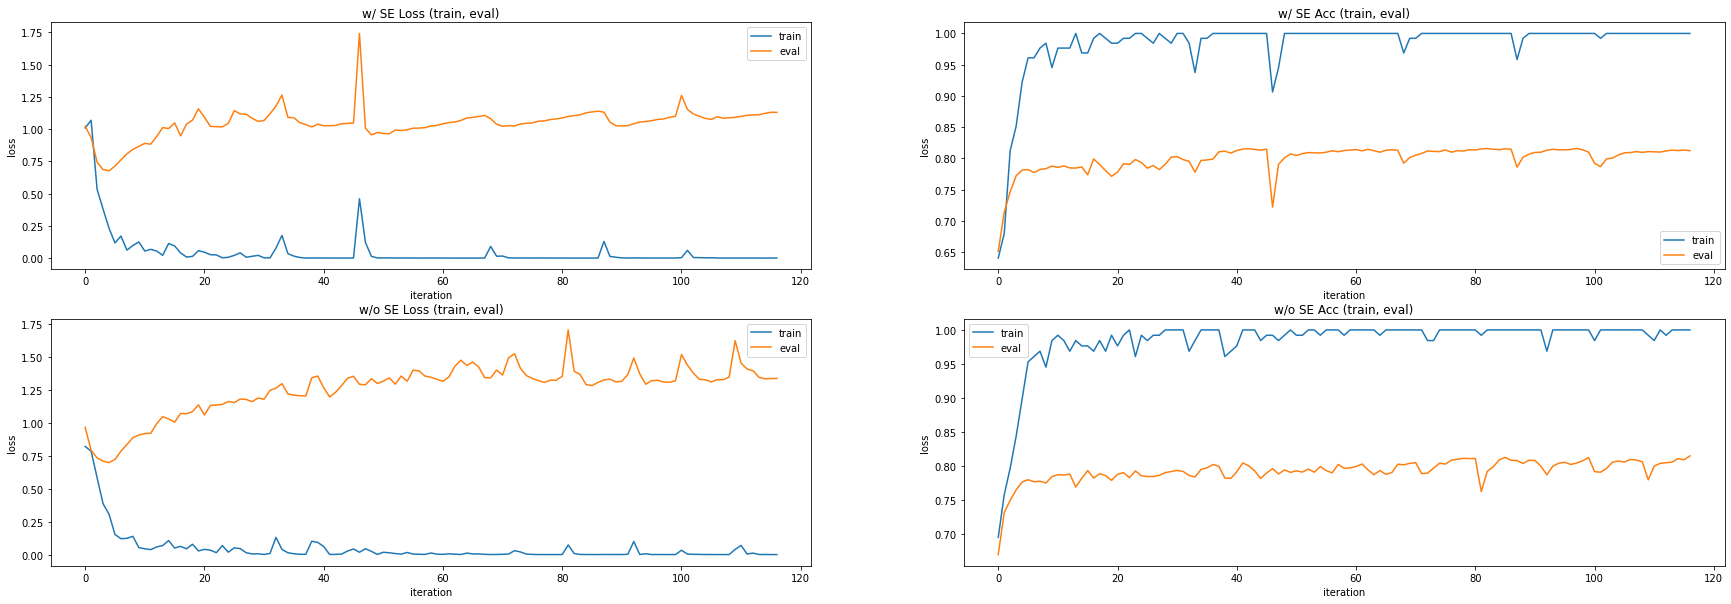

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,5))
plt.subplot(131)
step = range(len(result_without_SE[0]))
plt.plot(step, result_without_SE[0])
plt.plot(step, result_with_SE[0])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Train Loss (w/o SE, w/ SE)')
plt.legend(['w/o SE', 'w/ SE'])

plt.subplot(132)
step = range(len(result_without_SE[1]))
plt.plot(step, result_without_SE[1])
plt.plot(step, result_with_SE[1])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Eval Loss (w/o SE, w/ SE)')
plt.legend(['w/o SE', 'w/ SE'])

plt.subplot(133)
step = range(len(result_without_SE[3]))
plt.plot(step, result_without_SE[3])
plt.plot(step, result_with_SE[3])
plt.xlabel('iteration')
plt.ylabel('acc')
plt.title('Eval Acc (w/o SE, w/ SE)')
plt.legend(['w/o SE', 'w/ SE'])
plt.show()

plt.figure(figsize=(30,10))
plt.subplot(221)
step = range(len(result_with_SE[0]))
plt.plot(step, result_with_SE[0])
plt.plot(step, result_with_SE[1])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('w/ SE Loss (train, eval)')
plt.legend(['train', 'eval'])

plt.subplot(222)
step = range(len(result_with_SE[2]))
plt.plot(step, result_with_SE[2])
plt.plot(step, result_with_SE[3])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('w/ SE Acc (train, eval)')
plt.legend(['train', 'eval'])

plt.subplot(223)
step = range(len(result_without_SE[0]))
plt.plot(step, result_without_SE[0])
plt.plot(step, result_without_SE[1])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('w/o SE Loss (train, eval)')
plt.legend(['train', 'eval'])

plt.subplot(224)
step = range(len(result_without_SE[2]))
plt.plot(step, result_without_SE[2])
plt.plot(step, result_without_SE[3])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('w/o SE Acc (train, eval)')
plt.legend(['train', 'eval'])
plt.show()
